In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score

In [2]:
data = pd.read_csv('weight-height.csv')

In [3]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [41]:
data.Gender.replace({'Male':'xMale','Female':'yFemale'}, inplace = True)

In [42]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [43]:
data.duplicated().sum()

0

In [44]:
X = data.drop(columns='Gender')
y = data['Gender']

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=2)

In [46]:
model = LogisticRegression()

In [47]:
model.fit(train_X,train_y)

LogisticRegression()

In [48]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [49]:
model.predict(test_X)

array(['yFemale', 'xMale', 'xMale', ..., 'xMale', 'yFemale', 'xMale'],
      dtype=object)

In [50]:
model.predict_proba(train_X)

array([[0.95999479, 0.04000521],
       [0.97405865, 0.02594135],
       [0.8938834 , 0.1061166 ],
       ...,
       [0.00119425, 0.99880575],
       [0.97058193, 0.02941807],
       [0.01318803, 0.98681197]])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

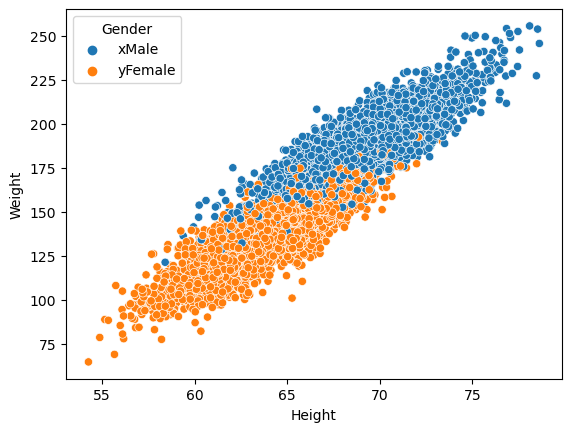

In [51]:
sns.scatterplot(x = train_X['Height'], y = train_X['Weight'], hue=train_y)

In [52]:
model.coef_

array([[ 0.47270371, -0.19464971]])

In [53]:
model.intercept_

array([0.00993086])

In [101]:
predict_proba = model.predict_proba(train_X)[:,0]

In [111]:
pred_after_threshold_03 = np.where(predict_proba>0.6, 'xMale', 'yFemale')

In [112]:
print("Train Result")
print(confusion_matrix(train_y, train_pred))
print(accuracy_score(train_y, train_pred))

Train Result
[[3210  286]
 [ 287 3217]]
0.9181428571428571


In [113]:
print("Train Result After threshold tuning to 0.3")
print(confusion_matrix(train_y, pred_after_threshold_03))
print(accuracy_score(train_y, pred_after_threshold_03))

Train Result After threshold tuning to 0.3
[[3111  385]
 [ 221 3283]]
0.9134285714285715


In [114]:
print(accuracy_score(train_y, train_pred))

0.9181428571428571


In [58]:
(3217+3210)/(3217+287+286+3210)

0.9181428571428571

In [59]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

       xMale       0.92      0.92      0.92      3496
     yFemale       0.92      0.92      0.92      3504

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [60]:
3217/(3217+286)

0.9183556951184699

In [61]:
print("Test Result")
print(confusion_matrix(test_y, test_pred))

Test Result
[[1396  108]
 [ 128 1368]]


In [62]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

       xMale       0.92      0.93      0.92      1504
     yFemale       0.93      0.91      0.92      1496

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [66]:
P = 0.93
R = 0.91
2*P*R/(P+R)

0.9198913043478261

In [64]:
1368/(1368+128)

0.9144385026737968

In [39]:
1396/(1396+108) # Female Precision

0.9281914893617021

In [75]:
test_pred_proba = model.predict_proba(test_X)
train_pred_proba = model.predict_proba(train_X)[:,1]

In [78]:
train_y_num = np.where(train_y=='xMale',0,1)

In [80]:
import matplotlib.pyplot as plt

Area under the Receiver Operating Characteristic curve: 0.9727858420059976


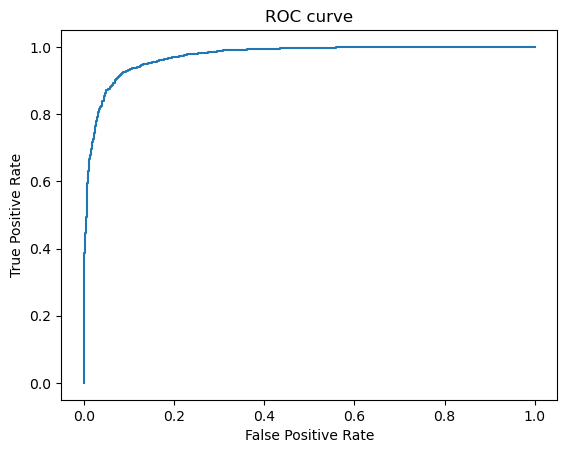

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(train_y_num, train_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(train_y_num, train_pred_proba))


In [ ]:
AUC - Area Under curve
ROC - Receving Operating Chracteristic

In [118]:
-np.log(0)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_1973/2869289095.py:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)


inf

In [120]:
res = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [121]:
#Y = 1
out = []
for i in res:
    out.append(-np.log(i))

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_1973/3057857641.py:3: RuntimeWarning: divide by zero encountered in log
  out.append(-np.log(i))


<AxesSubplot:>

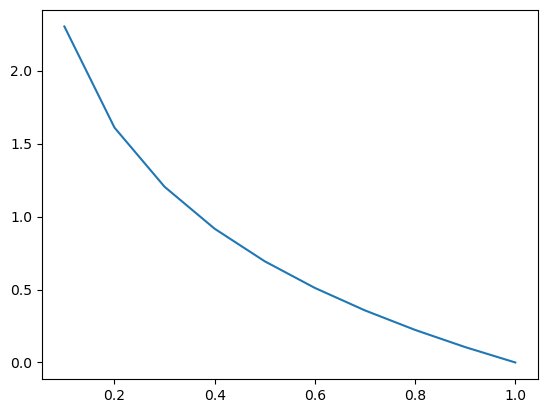

In [129]:
pd.Series(out,index = res).plot()

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_1973/766014257.py:5: RuntimeWarning: divide by zero encountered in log
  out.append(-np.log(1-i))


<AxesSubplot:>

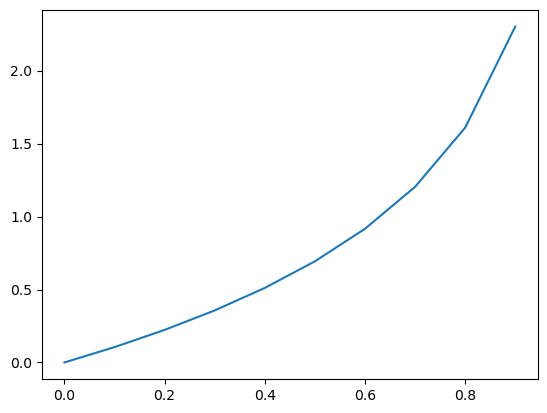

In [130]:
# Y =0

out = []
for i in res:
    out.append(-np.log(1-i))
    
pd.Series(out,index = res).plot()